DATA SCIENCE INTERN - 2022 WINTER

Peter Yu

Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
What metric would you report for this dataset?
What is its value?


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv('shoe_data.csv')

In [3]:
data.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [119]:
np.sum(data.order_amount)/np.max(data.order_id)

3145.128

Knowing that AOV is represented as:
    $AOV = sales / total_items$
We see that we have reason to be suspicious about some of our data. This is because we see our order_amount is on average 3145.128, but goes all the way to 704000! Additionally, our total_items has a mean of 8.78, but goes to 2000!


In [33]:
np.max(data.created_at)

'2017-03-30 9:55:00'

In [34]:
np.min(data.created_at)

'2017-03-01 0:08:09'

We can confirm the dataset truly contains 30 days worth of data from the two above lines.

We see that based on the order amount column, we would get a right-skewed distribution if we were to create a histogram, and that we can't elucidate much of what's going on with our dataset.
Instead, we apply a log function on the order amount.

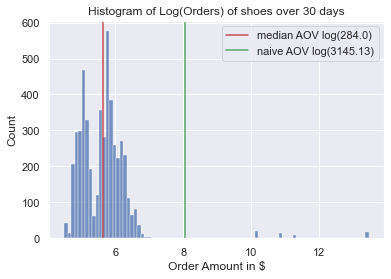

In [53]:
sns.histplot(np.log(data.order_amount))
median_val = np.median(data.order_amount)
plt.axvline(np.log(np.median(data.order_amount)), 0, color = 'r', label = f'median AOV log({median_val})')
plt.axvline(np.log(3145.13), 0, color = 'g',label = 'naive AOV log(3145.13)')
plt.legend()
plt.title('Histogram of Log(Orders) of shoes over 30 days')
plt.xlabel('Order Amount in $')
plt.show()

We see that from our histogram, our naive AOV (green) seems to be drawn from the low-frequency-high-order-amount values on the right of our distribution. Our newly proposed metric of using the data's median (red) seems to better represent our distribution. 

In [72]:
data[['total_items','order_amount']].groupby('total_items').describe().sort_values(by='total_items',ascending=False)

order_amount                                                   \
                   count           mean           std       min       25%   
total_items                                                                 
2000                17.0  704000.000000      0.000000  704000.0  704000.0   
8                    1.0    1064.000000           NaN    1064.0    1064.0   
6                    9.0   17940.000000  51153.864136     774.0     786.0   
5                   77.0     759.350649    161.174453     450.0     670.0   
4                  293.0     947.686007   5977.632918     360.0     520.0   
3                  941.0    1191.076514   7471.160149     270.0     402.0   
2                 1832.0     750.215066   4760.572162     180.0     264.0   
1                 1830.0     417.364481   2593.090627      90.0     132.0   

                                           
                  50%       75%       max  
total_items                                
2000         704000.0  704000.0  704000.0  
8              1064.0    1064.0    1064.0  
6               948.0     960.0  154350.0  
5               765.0     815.0    1760.0  
4               592.0     660.0  102900.0  
3               459.0     504.0   77175.0  
2               306.0     336.0   51450.0  
1               153.0     169.0   25725.0

In [78]:
data[['total_items','order_amount']].sort_values(by='total_items',ascending=False).groupby('order_amount').size()

order_amount
90        18
94        25
101       15
111       16
112       48
          ..
51450     16
77175      9
102900     1
154350     1
704000    17
Length: 258, dtype: int64

We see from our sorted data that 1. there seems to be 17 orders that are 704,000 each! That does not seem right especially when compared to the other data in the first table above
2. From the second table we have, it tells us that it's not just $704,000 that's throwing off our naive AOV value, but also 154350, 102900, etc.,

For interest sake, let's calculate the naive-AOV if those potential outlier values were omitted.

In [109]:
data[['order_id','order_amount']].groupby('order_amount').agg(['nunique']).tail(10)

,order_id
,nunique
order_amount,
1064,1
1086,1
1408,2
1760,1
25725,19
51450,16
77175,9
102900,1


In [110]:
new_data = data[data["order_amount"] < 25725]

In [120]:
new_data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [121]:
np.sum(new_data.order_amount)/np.max(new_data.order_id)

298.768

In [125]:
np.median(data.order_amount)

284.0

Our new naive-AOV is 298.77 having removed the "fishy" values that were 1-2 magnitudes larger than the rest of our order_amounts. If we were to use median instead of AOV for average order value, we would get 284 regardless of the outliers.

Q1A) To put shortly, there exists a small number of large orders that result in our order_amount data having a right-skewed distribution. Perhaps those stores are reselling the new Yeezys that Kanye West just tweeted about, or there was some popular celebrity that was caught wearing the newest Nike Air Mags, which led to those stores having abnormally high order_amounts. This led to our naive-AOV having a value of 3145, which certainly does not represent the rest of our data. 

Since shoes have a cult-ish following, we should instead keep a close eye on the news, especially if the stores hold high-demand shoes. We should also examine the stores 42, and 78 (based on our dataframe) to elucidate why exactly those stores are selling such large amounts. 

Q1B) To better report our dataset, I would recommend using median (284), which is very commonly used in situations like ours, where there's abnormally large values that skew our data. It is robust to such outliers. On the other hand, we can also use the updated AOV value having removed the large values (298.77).

Q1C) the median value is 284. The updated AOV would be 298.77

Q2A) How many orders were shipped by Speedy Express in total?

54

Select COUNT(S.ShipperID) FROM Orders O, Shippers S
ON O.ShipperID = S.ShipperID
WHERE ShipperName = "Speedy Express";

Q2B) What is the last name of the employee with the most orders?

Peacock

Select E.LastName, Count($*$) Freq FROM ORDERS O, Employees E
ON O.EmployeeID = E.EmployeeID
GROUP BY E.LastName
ORDER BY Freq DESC;

Q3C) What product was ordered the most by customers in Germany?

Boston Crab Meat

Select ProductName, SUM(QUANTITY) TOTAL FROM Orders O, Customers C ON O.CustomerID = C.CustomerID
JOIN OrderDetails D ON O.OrderID = D.OrderID
JOIN Products P ON P.ProductID = D.ProductID
WHERE Country = "Germany"
GROUP BY D.ProductID
ORDER BY TOTAL DESC